In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('voice.csv')

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
x = data.iloc[:,0:-1]
x.shape

(3168, 20)

In [5]:
data.shape

(3168, 21)

In [16]:
y = data.iloc[:,-1]
y.shape

(3168,)

In [17]:
x.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
dtype: int64

In [18]:
y.isnull().sum()

0

In [19]:
y.value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [23]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(792, 20)
(2376, 20)
(2376,)
(792,)


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,bootstrap=True,max_depth=10,max_features='sqrt',random_state=42,verbose=1)

In [38]:
model = rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.1s finished


In [39]:
model.score(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


0.9991582491582491

In [41]:
output = rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [46]:
output = pd.DataFrame(output)
output[0].value_counts()

0    399
1    393
Name: 0, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix,roc_auc_score
cm = confusion_matrix(y_test,output)
cm

array([[391,  13],
       [  8, 380]], dtype=int64)

In [51]:
roc_value = roc_auc_score(y_test,output)

In [52]:
roc_value

0.9736016127385935

In [81]:
df_feature_importance = pd.DataFrame(model.feature_importances_ ,columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
12,0.354840
5,0.222700
3,0.134782
1,0.075070
8,0.037453
9,0.030181
11,0.020988
0,0.018170
2,0.015367
10,0.014088


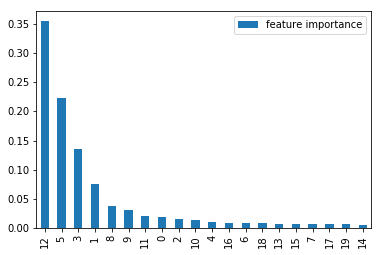

In [84]:
df_feature_importance.plot(kind='bar')
plt.show()

In [86]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,output)
ac

0.9734848484848485